<a href="https://colab.research.google.com/github/Farrel44/Tugas_Unsupervised_Learning/blob/main/Tugas_Unsupervised_Farrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:

K-means clustering algorithm bekerja dengan menaruh beberapa centroids di posisi random. Lalu setiap data yang ada di dataframe, akan dicari jaraknya dengan centroids, dan dipilih centroids paling deket. Setelah itu, berdasarkan jaraknya dengan centroid, data akan dikelompokkan dalam cluster paling dekat. Centroid akan diganti posisi nya berdasarkan rata – rata dari semua data yang ada di cluster. Udh selesai ketika tidak ada pergantian posisi cluster i.e centroid tidak berubah

Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Ekskul_AI/Data/pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan drop data null
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan..
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k dari rekomendasi metode Elbow lalu visualisasikan
*   Hitung silhoutte Coefficient










In [ ]:
# code di sini
df.isna().sum()

,0
ID_pelanggan,0
Jenis Kelamin,0
Umur,5
Pendapatan pertahun (juta),0
Skor Belanja (1-100),4


In [ ]:
df.shape

(250, 5)

In [ ]:
# handling missing value with drop null
df.dropna(inplace=True)
df.shape

(241, 5)

In [ ]:
# cek apakah masih ada null di df
df.isna().sum()

,0
ID_pelanggan,0
Jenis Kelamin,0
Umur,0
Pendapatan pertahun (juta),0
Skor Belanja (1-100),0


<Axes: xlabel='Umur', ylabel='Count'>

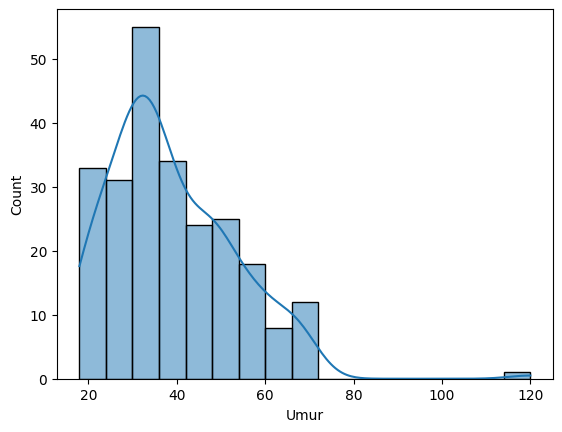

In [ ]:
sns.histplot(x=df['Umur'], kde=True)

<Axes: xlabel='Skor Belanja (1-100)', ylabel='Count'>

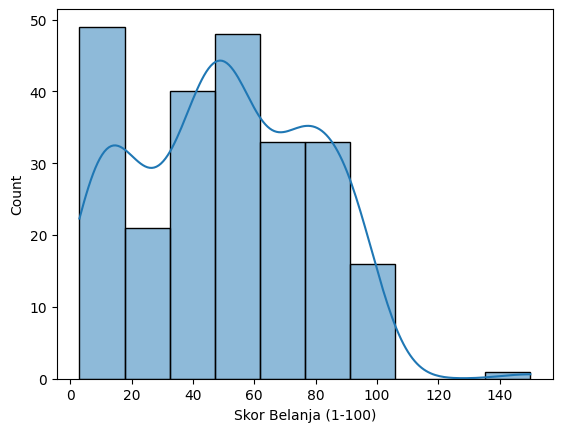

In [ ]:
sns.histplot(x=df['Skor Belanja (1-100)'], kde=True)

Yang cek outlier ini saya hanya ber-eksperimental saja, langsung saja ke metode interquartile range untuk menghandle outlier

In [ ]:
# cek outlier dengan z score ( berapa banyak deviasi standar dari mean )
# untuk umur
mean_umur = np.mean(df['Umur'])
std_umur = np.std(df['Umur'])
z_score_umur = (df['Umur'] - mean_umur) / std_umur
z_score_umur

,Umur
0,-1.383732
1,-1.244172
2,-1.313952
3,-1.104612
4,-0.546370
...,...
245,1.407475
246,-0.267249
247,-0.127689
248,-0.476590


In [ ]:
z_score_umur.mean()

1.9901093221496583e-16

<Axes: xlabel='Umur'>

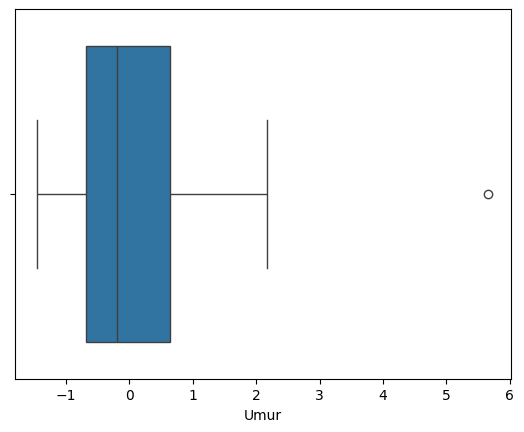

In [ ]:
sns.boxplot(x=z_score_umur)

In [ ]:
# untuk skor belanja ( 1 - 100)
mean_skor = np.mean(df['Skor Belanja (1-100)'])
std_skor = np.std(df['Skor Belanja (1-100)'])
z_score_skor = (df['Skor Belanja (1-100)'] - mean_skor) / std_skor
z_score_skor

,Skor Belanja (1-100)
0,-0.399513
1,1.077969
2,-1.560391
3,0.937256
4,-0.364335
...,...
245,-1.278966
246,1.394572
247,-0.645760
248,1.253860


<Axes: xlabel='Skor Belanja (1-100)'>

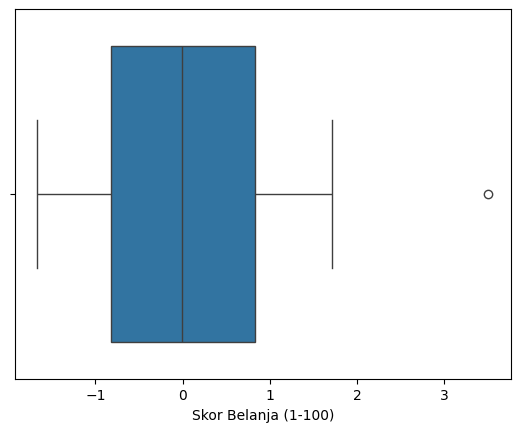

In [ ]:
sns.boxplot(x=z_score_skor)

In [ ]:
z_score_skor.mean()

3.869657015291002e-17

In [ ]:
df_z_skor = pd.DataFrame({'Umur': z_score_umur, 'Skor Belanja (1-100)': z_score_skor})
df_z_skor.head()

,Umur,Skor Belanja (1-100)
0,-1.383732,-0.399513
1,-1.244172,1.077969
2,-1.313952,-1.560391
3,-1.104612,0.937256
4,-0.546370,-0.364335


<Axes: xlabel='Umur', ylabel='Skor Belanja (1-100)'>

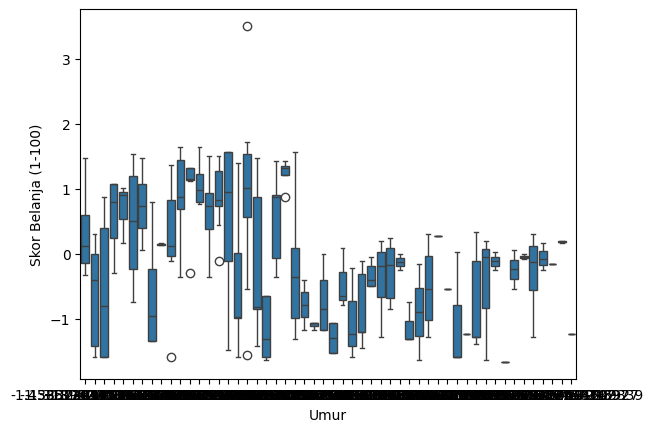

In [ ]:
sns.boxplot(x=df_z_skor['Umur'], y=df_z_skor['Skor Belanja (1-100)'])

In [ ]:
# Handling outlier menggunakan metode Interquartile range
q1Umur = df['Umur'].quantile(0.25)
q3Umur = df['Umur'].quantile(0.75)
q1Skor = df['Skor Belanja (1-100)'].quantile(0.25)
q3Skor = df['Skor Belanja (1-100)'].quantile(0.75)
print(f"q1 Umur : {q1Umur} dan q3 Umur : {q3Umur}")
print(f"q1 Skor : {q1Skor} dan q3 Skor : {q3Skor}")

q1 Umur : 29.0 dan q3 Umur : 48.0
q1 Skor : 27.0 dan q3 Skor : 74.0


In [ ]:
iqrUmur = q3Umur - q1Umur
iqrSkor = q3Skor - q1Skor
print(f"iqr Umur : {iqrUmur}")
print(f"iqr Skor : {iqrSkor}")

iqr Umur : 19.0
iqr Skor : 47.0


In [ ]:
lowerUmur = q1Umur - 1.5 * iqrUmur
upperUmur = q3Umur + 1.5 * iqrUmur
lowerSkor = q1Skor - 1.5 * iqrSkor
upperSkor = q3Skor + 1.5 * iqrSkor
print(f"lower Umur : {lowerUmur} dan upper Umur : {upperUmur}")
print(f"lower Skor : {lowerSkor} dan upper Skor : {upperSkor}")

lower Umur : 0.5 dan upper Umur : 76.5
lower Skor : -43.5 dan upper Skor : 144.5


In [ ]:
df_trim = df[(df['Umur'] > lowerUmur) & (df['Umur'] <upperUmur) & (df['Skor Belanja (1-100)'] > lowerSkor) & (df['Skor Belanja (1-100)'] < upperSkor)]
df_trim

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
244,245,Laki-laki,27.0,88,69.0
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0


<Axes: xlabel='Umur', ylabel='Count'>

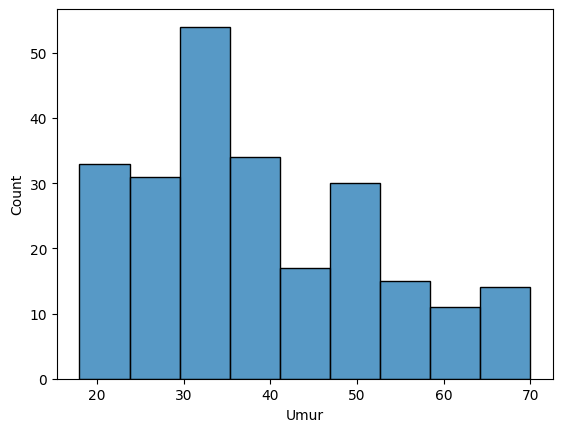

In [ ]:
sns.histplot(df_trim['Umur'])

<Axes: xlabel='Umur', ylabel='Count'>

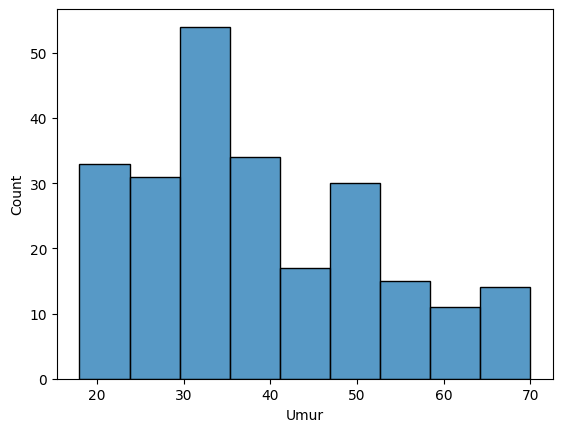

In [ ]:
sns.histplot(df_trim['Umur'])

<Axes: xlabel='Umur', ylabel='Skor Belanja (1-100)'>

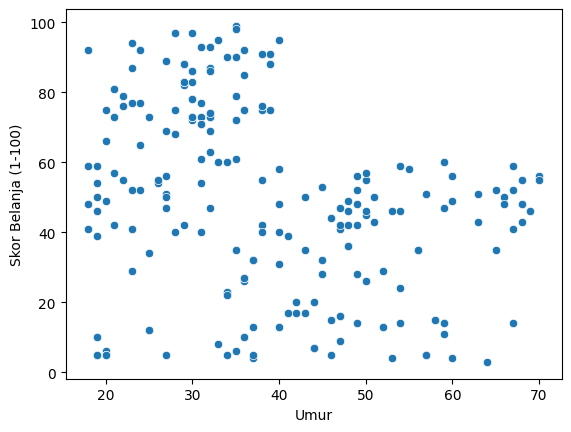

In [ ]:
sns.scatterplot(x=df_trim['Umur'], y=df_trim['Skor Belanja (1-100)'])

In [ ]:
# Lakukan rescaling data menggunakan StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_trim[['Umur', 'Skor Belanja (1-100)']])
df_scaled

array([[-1.4565257 , -0.40009983],
       [-1.30718652,  1.11544812],
       [-1.38185611, -1.5908875 ],
       [-1.15784733,  0.97111022],
       [-0.56049059, -0.36401535],
       [-1.23251692,  0.93502575],
       [-0.26181221, -1.5908875 ],
       [-1.15784733,  1.58454629],
       [ 1.90360599, -1.69914092],
       [-0.63516018,  0.79068785],
       [ 2.12761477, -1.3022117 ],
       [-0.26181221,  1.76496867],
       [ 1.45558843, -1.26612722],
       [-1.08317774,  0.97111022],
       [-0.11247303, -1.33829617],
       [-1.23251692,  1.04327917],
       [-1.38185611,  0.574181  ],
       [ 1.00757087, -0.76094458],
       [-0.26181221,  1.72888419],
       [-0.26181221, -0.54443773],
       [-1.00850814,  0.82677232],
       [ 0.55955331, -1.62697197],
       [-0.56049059,  0.82677232],
       [ 1.15691006, -1.3022117 ],
       [-0.70982977,  1.15153259],
       [ 0.48488372, -0.65269115],
       [-0.26181221,  0.39375862],
       [ 0.11153575, -0.68877563],
       [-1.15784733,

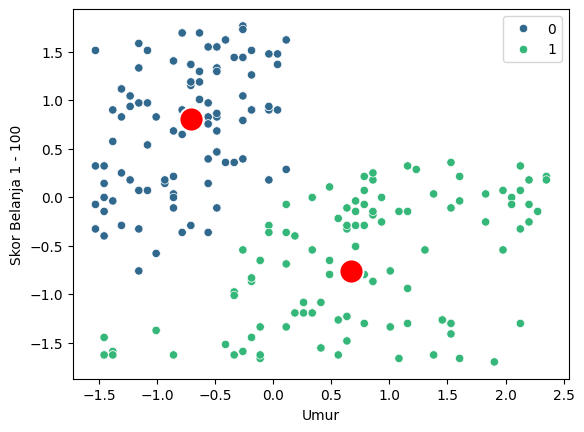

In [ ]:
# Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.

kmeans = KMeans(init="random", n_clusters=2, random_state=64)
kmeans.fit(df_scaled)
c = kmeans.cluster_centers_
sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], hue=kmeans.labels_, palette='viridis')
sns.scatterplot(x=c[:,0], y=c[:,1], s=300, color='red')
plt.ylabel('Skor Belanja 1 - 100')
plt.xlabel('Umur')
plt.show()

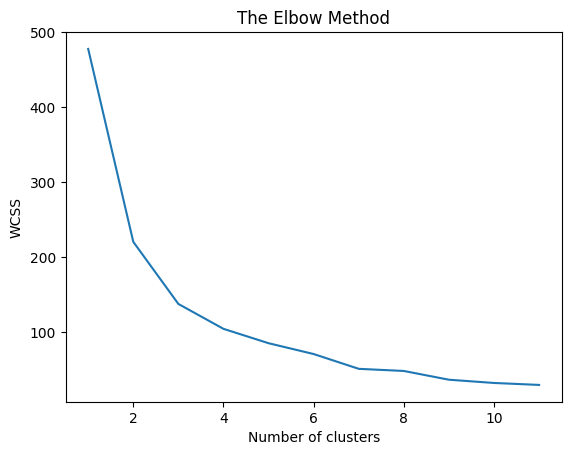

In [ ]:
# Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
WCSS = []
for i in range(1,12):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(df_scaled)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1,12), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

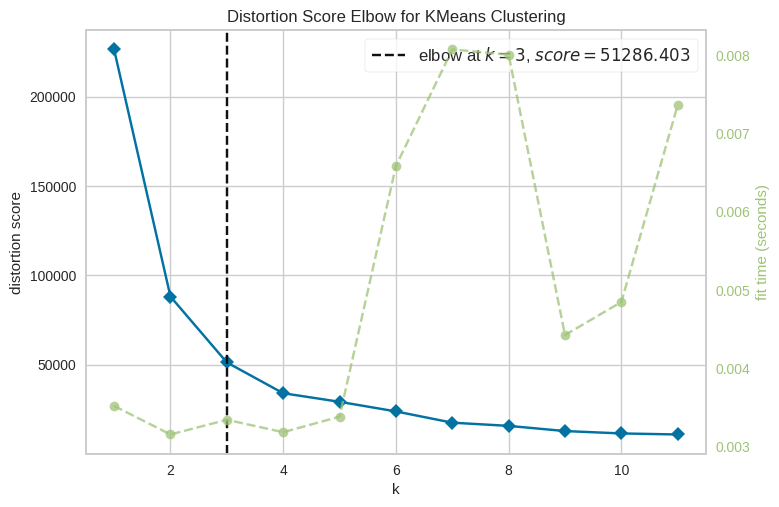

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=64)
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_trim[['Umur', 'Skor Belanja (1-100)']])
visualizer.show()

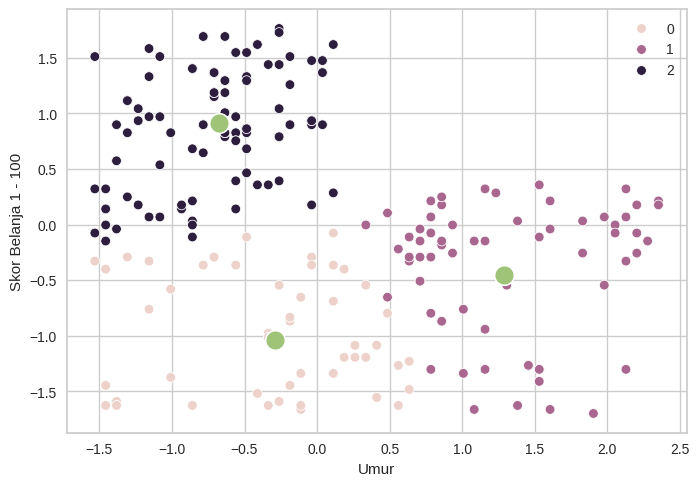

In [ ]:
# Gunakan k dari rekomendasi metode Elbow lalu visualisasikan
kmeans = KMeans(init="random", n_clusters=3, random_state=64)
kmeans.fit(df_scaled)
c = kmeans.cluster_centers_
sns.scatterplot(x=df_scaled[:,0],y=df_scaled[:,1],hue=kmeans.labels_)
sns.scatterplot(x=c[:,0], y=c[:,1], s=200)
plt.ylabel('Skor Belanja 1 - 100')
plt.xlabel('Umur')
plt.show()

In [ ]:
# Hitung silhoutte Coefficient
silhoutCoefficient = silhouette_score(df_scaled, kmeans.fit_predict(df_scaled))
silhoutCoefficient

0.47253731463291376

In [ ]:
#Cara kedua hitung
kmeans = KMeans(init="random", n_clusters=3, random_state=64)
kmeans.fit(df_scaled)
silhoutteCoefficient2 = silhouette_score(df_scaled, kmeans.labels_ , metric='euclidean')
silhoutteCoefficient2

0.47253731463291376

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket.

Jawab disini:
Graph yang dihasilkan menunjukkan bahwa usia mempengaruhi kepuasan belanja. ada cluster yang menunjukkan bahwa pelanggan yg lebih muda / produktif memiliki rating lebih tinggi. dan pelanggan yang lebih tua memiliki rating memili